# **(HEALTHCARE_INSURANCE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"
* Fetching pre-selected CSV file from Kaggle and saving as Raw data. 

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Hackathon1_Healthcare_Insurance_Cost_Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Hackathon1_Healthcare_Insurance_Cost_Analysis'

# Section 1

Section 1 content

In [4]:
# import libraries 

import pandas as pd
import numpy as np

In [5]:
# convert CSV file to a DataFrame

df_insurance = pd.read_csv(r'.venv/Dataset/Raw/insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Check the first 5 rows
df_insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
## Check summary statistics
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Check the data types of the columns
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Check for missing variables
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

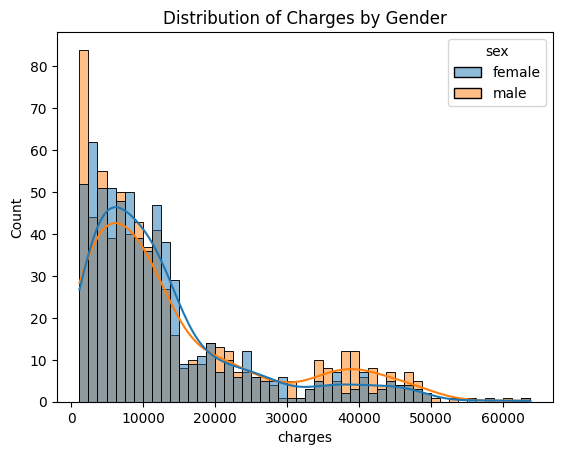

In [10]:
# Visualizing the distribution of charges by gender

import matplotlib.pyplot as plt
import seaborn as sns


## converting dataframe to a histogram plot showing the correlation betweens sexes and charges
# Using seaborn as a visualization tool for simplier coding
sns.histplot(data=df_insurance, x='charges', hue='sex', bins=50, kde=True, alpha=0.5)
# Adding a title to the plot
plt.title('Distribution of Charges by Gender')
plt.show()



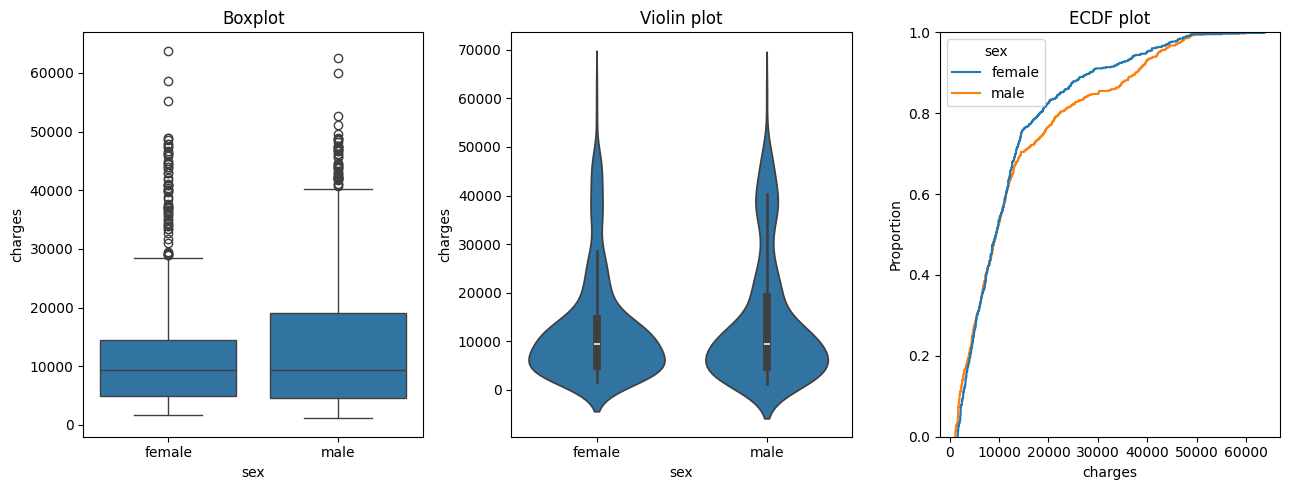

In [11]:
### Creating multiple plots to get a clearer result

## Setup the figure with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

# Boxplot
sns.boxplot(data=df_insurance, x='sex', y='charges', ax=axes[0])
axes[0].set_title('Boxplot')

# Violin plot
sns.violinplot(data=df_insurance, x='sex', y='charges', ax=axes[1])
axes[1].set_title('Violin plot')

# ECDF plot (Cumulative Distribution)
sns.ecdfplot(data=df_insurance, x='charges', hue='sex', ax=axes[2])
axes[2].set_title('ECDF plot')


## Display all plots 
plt.tight_layout()
plt.show()


sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64


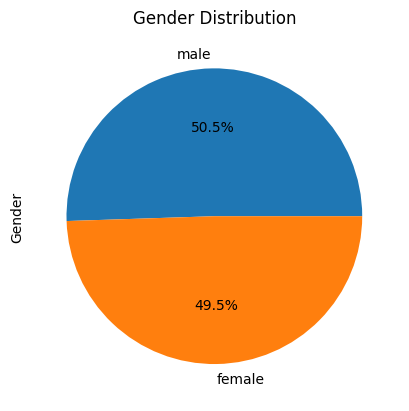

In [12]:
## percentile ratio between the sexes

gender_counts = df_insurance['sex'].value_counts(normalize=True) * 100
print(gender_counts)

## Visualization through pie plot

df_insurance['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('Gender')
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


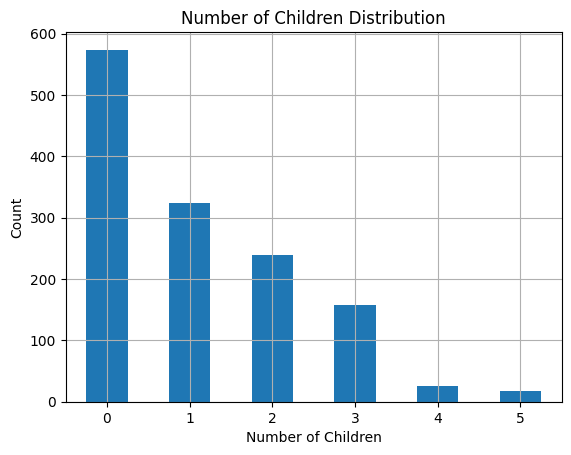

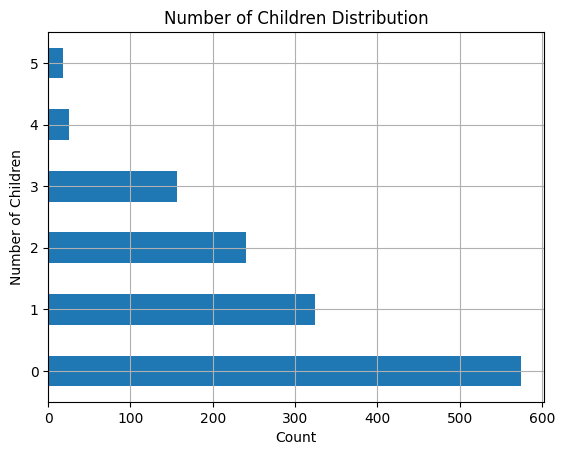

In [13]:
## Check other factors to see if they influence insurance costs
# Does children affect insurance costs?

## List unique values
print(df_insurance['children'].value_counts())

# Visualise the data in a bar plot to better understand.
df_insurance['children'].value_counts().plot.bar()
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Show in barh plot
df_insurance['children'].value_counts().plot.barh()
plt.title('Number of Children Distribution')
plt.xlabel('Count')
plt.ylabel('Number of Children')
plt.grid(True)
plt.show()

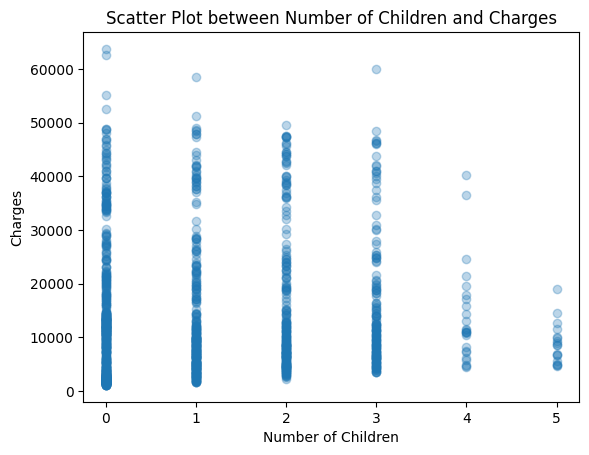

In [14]:
## Show a scatter plot between children and charges
plt.scatter(df_insurance['children'], df_insurance['charges'], alpha=0.3)
plt.title('Scatter Plot between Number of Children and Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

<Axes: ylabel='count'>

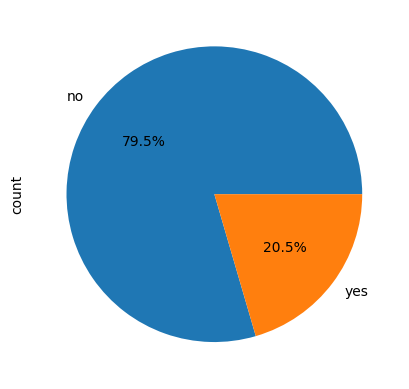

In [11]:
## Does being a smoker impact insurance costs?
# Check the value counts for the 'smoker' column
df_insurance['smoker'].value_counts()

# Visualize in a pie chart
df_insurance['smoker'].value_counts().plot.pie(autopct='%1.1f%%')

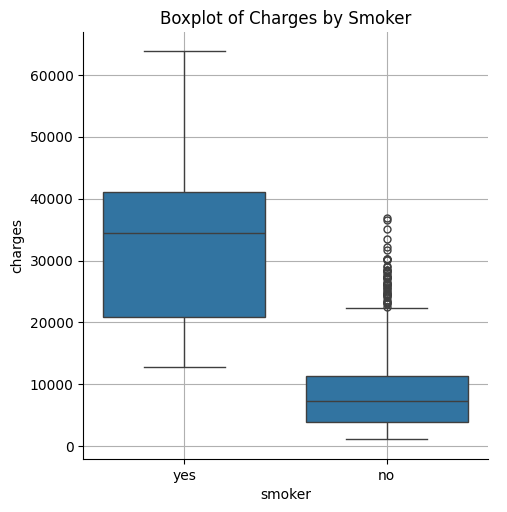

In [ ]:
## Using Categorical plot for better visualisation when mixing categorical and numerical data simultaneously.
sns.catplot(data=df_insurance, x='smoker', y='charges', kind='box')
plt.title('Boxplot of Charges by Smoker')
plt.grid(True)
plt.show()

In [17]:
## Filter out the non-smoker outliers from the dataset
non_smokers = df_insurance[df_insurance['smoker'] == 'no']

Q1 = non_smokers['charges'].quantile(0.25)
Q3 = non_smokers['charges'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

# Non-smoker outliers
ns_outliers = non_smokers[(non_smokers['charges'] < Lower_bound) | (non_smokers['charges'] > Upper_bound)]

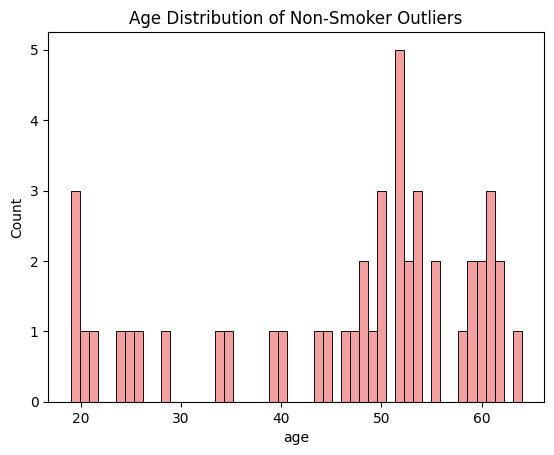

In [25]:
## Exploring outliers across other variables using visualtion plots
# Age
sns.histplot(ns_outliers['age'], bins=50, color='lightcoral')
plt.title('Age Distribution of Non-Smoker Outliers')
plt.show()

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
